In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from experiments.conf import RESULTS_PATH
from esmpy.conf import DATASETS_PATH
from esmpy.measures import find_min_angle, find_min_MSE, ordered_mse, find_min_config
from pathlib import Path
import matplotlib.pyplot as plt
import re
import numpy as np
import hyperspy.api as hs


In [3]:
i = 4

file = "new_sim_data/FpBrgCaPv_N18_VCA_batch.npz"
path = RESULTS_PATH/ Path(file)
res = np.load(path,allow_pickle=True)

# G = res["G_{}".format(i)]
# W = res["W_{}".format(i)]
D = res["D_{}".format(i)]
H = res["H_{}".format(i)]
# GW = G@W
GW = D

dataset_path = DATASETS_PATH / Path("FpBrgCaPv_N18_paper/sample_{}.hspy".format(i))
spim = hs.load(str(dataset_path))
true_spectra = spim.phases
true_maps = spim.maps
shape_2d =  spim.shape_2d

angles, mse, true_ind_spec, warning = find_min_config(true_maps,true_spectra.T,H,GW.T,angles = False)
# mse = ordered_mse(true_maps,H,true_ind_spec)

k = spim.phases.shape[1]
print(np.max(H[true_ind_spec[2]]))

0.9999999996108515


In [43]:
spim.maps_2d.shape

(128, 128, 3)

In [50]:
d = {}
d["x"] = x
d["true_D_0"] = true_spectra[:,0]
d["true_D_1"] = true_spectra[:,1]
d["true_D_2"] = true_spectra[:,2]
d["true_H_0"] = spim.maps_2d[:,:,0]
d["true_H_1"] = spim.maps_2d[:,:,1]
d["true_H_2"] = spim.maps_2d[:,:,2]

np.savez("true_s4_n18.npz",**d)

# Load data and ground truth

1.349077149531151


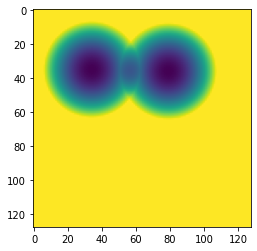

In [10]:
# file = "tests_mu_l_N293/FpBrgCaPv_N293_s5_rs47_lmu0p0005_l0p05_er0p01.npz"
# file = "new_sim_data/FpBrgCaPv_N293_s0_random_rs1_fwbrg.npz"
file = "FpBrgCaPv_N18_s4_random_rs7_noS.npz"
dataset_path = DATASETS_PATH / Path("FpBrgCaPv_N293_paper/sample_4.hspy")
# path = "/mnt/c/Users/teurtrie/Travail/SNMF_EDXS/results/res_data_papr/FpBrgCaPv_N293_SmoothNMF_fPnone_s0.npz"
path = RESULTS_PATH/ Path(file)
res = np.load(path,allow_pickle=True)
spim = hs.load(str(dataset_path))
true_spectra = spim.phases
true_maps = spim.maps
shape_2d =  spim.shape_2d

G = res["G"]
W = res["W"]
H = res["H"]
GW = G@W
metrics = res["metrics"]
losses = res["losses"]
angles, true_ind_spec = find_min_angle(true_spectra.T,(GW).T,get_ind=True, unique=True)
mse = ordered_mse(true_maps,H,true_ind_spec)

k = spim.phases.shape[1]
print(np.max(H[true_ind_spec[2]]))
plt.imshow(spim.maps_2d[:,:,0])

## Plot params

In [7]:
fontsize = 30
scale = 15
aspect_ratio = 1.4
marker_list = ["-o","-s","->","-<","-^","-v","-d"]
mark_space = 20


# Plot spectra and maps

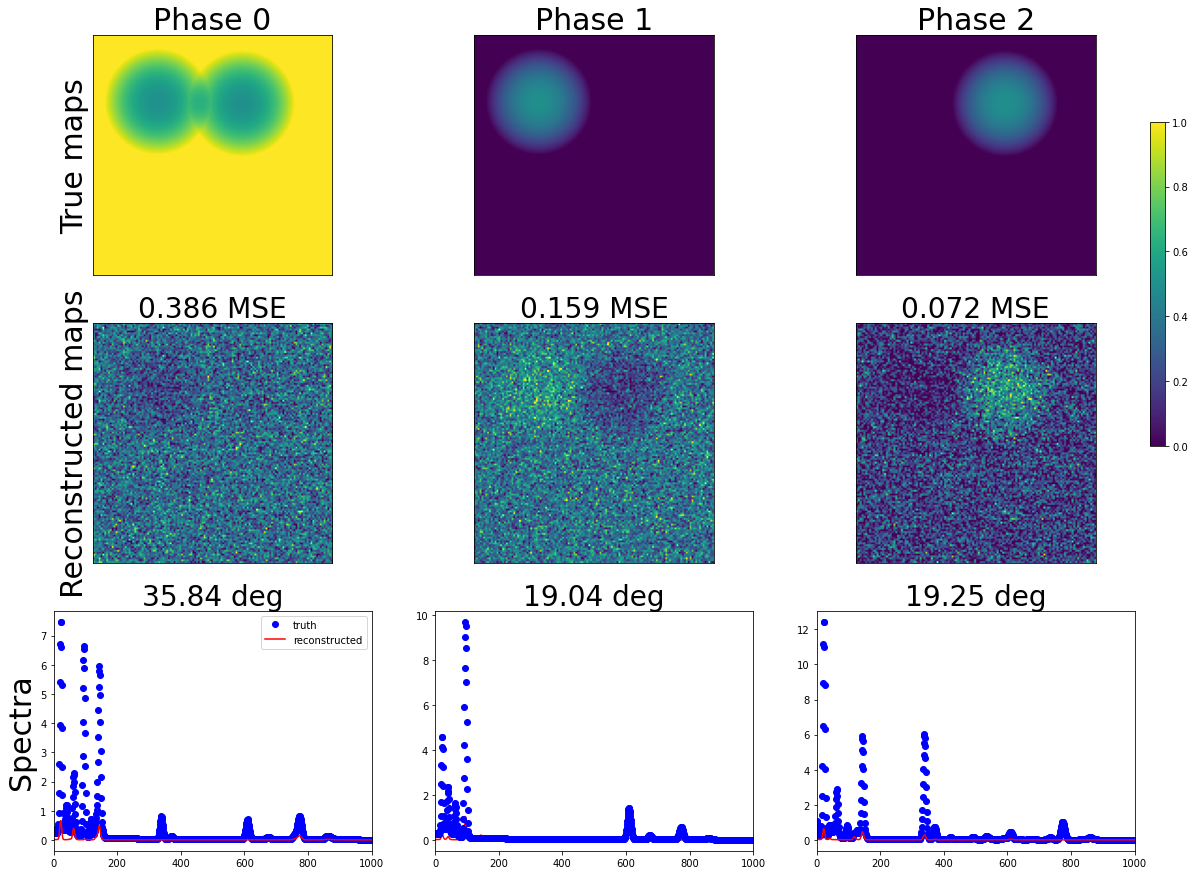

In [11]:
fig, axes = plt.subplots(k,3,figsize = (scale/k * 3 * aspect_ratio,scale))
for i, spectre in enumerate(true_spectra.T): 
    axes[2,i].plot(true_spectra.T[i],'bo',label='truth',linewidth=4)
    axes[2,true_ind_spec[i]].plot(GW.T[i] ,'r-',label='reconstructed',markersize=3.5)
    axes[2,true_ind_spec[i]].set_title("{:.2f} deg".format(angles[i]),fontsize = fontsize-2)
    axes[2,i].set_xlim(0,1000)

    axes[1,true_ind_spec[i]].imshow(H[i].reshape(shape_2d),vmin = 0.0,vmax = 1.0)
    axes[1,true_ind_spec[i]].set_title("{:.3f} MSE".format(mse[i]),fontsize = fontsize-2)
    # axes[i,1].set_ylim(0.0,1.0)
    axes[1,i].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)

    im = axes[0,i].imshow(true_maps[i].reshape(shape_2d),vmin = 0.0,vmax = 1.0)
    axes[0,i].set_title("Phase {}".format(i),fontsize = fontsize)
    axes[0,i].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)
    axes[2,0].legend()

rows = ["True maps","Reconstructed maps","Spectra"]

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=fontsize)


fig.subplots_adjust(right=0.84)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.85, 0.5, 0.01, 0.3])
fig.colorbar(im,cax=cbar_ax)

# fig.tight_layout()

plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

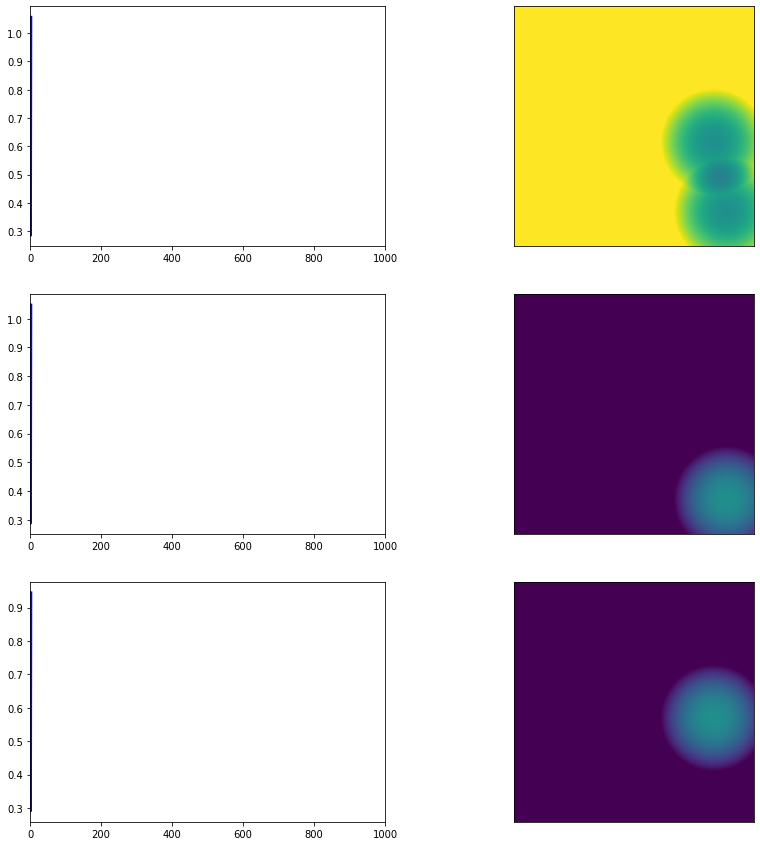

In [34]:
fig, axes = plt.subplots(k,2,figsize = (scale/k * 2 * aspect_ratio,scale))
for i, spectre in enumerate(true_spectra):
    axes[i,0].plot(true_spectra[i],'b-',label='truth',linewidth=3)
    axes[i,0].set_xlim(0,1000)
    
    im = axes[i,1].imshow(true_maps[i].reshape(shape_2d),vmin = 0.0, vmax = 1.0)
    axes[i,1].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)
    
axes[0,0].set_title("True spectra",fontsize = fontsize)
axes[0,1].set_title("True maps",fontsize = fontsize)
    
fig.subplots_adjust(right=0.84)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
fig.colorbar(im,cax=cbar_ax)

In [ ]:
np.savetxt("true_spectra.txt",true_spectra)
np.savetxt("GP.txt",GP.T)

In [ ]:
fig, axes = plt.subplots(2,k,figsize = (scale/k * 3 * aspect_ratio,scale))
fig.subplots_adjust(wspace=0.01,hspace=0.01)



for i, spectre in enumerate(true_spectra): 
    # axes[1,i].plot(true_spectra[i],'bo',label='truth',linewidth=4)
    # axes[1,i].plot(GP.T[true_ind_spec[i]] ,'r-',label='reconstructed',markersize=3.5)
    # axes[1,i].set_title("{:.2f} deg".format(angles[i]),fontsize = fontsize-2)
    # axes[1,i].set_xlim(0,1000)

    axes[1,i].imshow(A[true_ind_spec[i]].reshape(shape_2d),vmin = 0.0, vmax = 1.0 )
    axes[1,i].set_title("{:.2f} MSE".format(mse[i]),fontsize = fontsize-2)
    axes[1,i].tick_params(axis=u'both', which=u'both',length=0)
    axes[1,i].set_xticklabels([])
    axes[1,i].set_yticklabels([])
    # axes[i,1].set_ylim(0.0,1.0)

    im = axes[0,i].imshow(true_maps[i].reshape(shape_2d),vmin = 0.0, vmax = 1.0)
    axes[0,i].set_title("Phase {}".format(i),fontsize = fontsize)
    axes[0,i].tick_params(axis=u'both', which=u'both',length=0)
    axes[0,i].set_xticklabels([])
    axes[0,i].set_yticklabels([])

    # axes[2,0].legend()

rows = ["Truth","Reconstructed","Spectra"]

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=fontsize)


fig.subplots_adjust(right=0.84)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.85, 0.4, 0.02, 0.3])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)

# fig.tight_layout()

plt.show()

# Plot losses

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(4*scale,scale))

names = list(losses.dtype.names)
for j,name in enumerate(names) :
    if re.match(r".*(loss)",name) : 
        axes[0].plot(losses[name],marker_list[j%len(marker_list)],markersize=3.5,label = name,markevery = mark_space,linewidth = 2)
        axes[0].set_yscale("log")
        axes[0].set_xscale("log")
        axes[0].tick_params(axis='both', which='major', labelsize=fontsize-5)
        axes[0].set_xscale("log")
        axes[0].legend(fontsize = fontsize -2)
        axes[0].set_xlabel("number of iterations",fontsize = fontsize -5)
    elif re.match(r"^(rel)",name) : 
        axes[1].plot(losses[name],marker_list[j%len(marker_list)],markersize=3.5,label = name,markevery = mark_space,linewidth = 2)
        axes[1].legend(fontsize = fontsize -2)
        axes[1].set_yscale("log")
        axes[1].set_xscale("log")
        axes[1].tick_params(axis='both', which='major', labelsize=fontsize-5)
        axes[1].set_xlabel("number of iterations",fontsize = fontsize -5)
    elif re.match(r"^(ang)",name) :
        axes[2].plot(losses[name],marker_list[j%len(marker_list)],markersize=3.5,label = name,markevery = mark_space,linewidth = 2)
        axes[2].legend(fontsize = fontsize -2)
        axes[2].set_xscale("log")
        axes[2].tick_params(axis='both', which='major', labelsize=fontsize-5)
        axes[2].set_xlabel("number of iterations",fontsize = fontsize -5)
    elif re.match(r"^(mse)",name) :
        axes[3].plot(losses[name],marker_list[j%len(marker_list)],markersize=3.5,label = name,markevery = mark_space,linewidth = 2)
        axes[3].legend(fontsize = fontsize -2)
        axes[3].set_xscale("log")
        axes[3].tick_params(axis='both', which='major', labelsize=fontsize-5)
        axes[3].set_xlabel("number of iterations",fontsize = fontsize -5)